In [1]:
import math

from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "iris.data"

Đọc dữ liệu

In [3]:
x = np.genfromtxt(data_path, delimiter=",", usecols=(0, 1, 2, 3))

In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Đọc nhãn các loại hoa

In [5]:
y = np.genfromtxt(data_path, delimiter=",", usecols=4, dtype=str)

In [6]:
y.tolist()

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',


Tên các đặc trưng tương ứng

In [7]:
names = ["setal_length", "setal_width", "petal_length", "petal_width"]

Đặt màu tương ứng với các loại hoa

In [8]:
color_dict = {'Iris-setosa': "red", 'Iris-versicolor': "green", 'Iris-virginica': "blue"}

Vẽ biểu đồ scatter plot với từng cặp đặc trưng

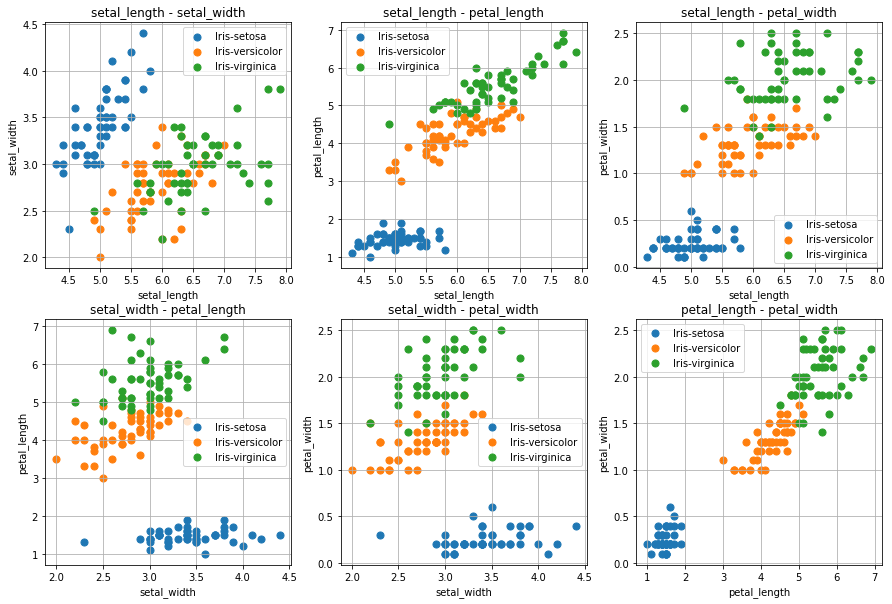

In [9]:
fig = plt.figure(figsize=(15, 10), facecolor='w')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
nums = len(list(combinations(range(x.shape[1]), r=2)))
cols = 3
rows = math.ceil(nums/cols)
i = 0

for couple in combinations(range(x.shape[1]), r=2):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title("{} - {}".format(names[couple[0]], names[couple[1]]))
    x_ax = x[:, couple[0]]
    y_ax = x[:, couple[1]]
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(x_ax[ix], y_ax[ix], label=g, s=50)

    ax.set_xlabel(names[couple[0]])
    ax.set_ylabel(names[couple[1]])
    ax.set_aspect(abs((x_ax.max() - x_ax.min())/(y_ax.max() - y_ax.min())) * 1.0)
    ax.grid()
    ax.legend()
    i += 1

Để thực hiện phân tích SVD thu gọn:

$$\bold{D}=\bold{L}_d \Delta_d \bold{R}_d^T$$

Ta sử dụng:

$$\bold{D}^T\bold{D}=\Big(\bold{L}_d \Delta_d \bold{R}_d^T \Big)^T \Big( \bold{L}_d \Delta_d \bold{R}_d^T \Big)=\bold{R}_d\Delta_d^T \bold{L}_d^T\bold{L}_d\Delta_d \bold{R}_d^T=\bold{R}_d \Delta_d^2 \bold{R}_d^T$$

với $\Delta_d^2$ là ma trận đường chéo kích thước $d \times d$ và $\Delta_d^2(i, i)=\delta_i^2, i=1, \dots, d$

- Ta chéo hóa $\bold{D}^T\bold{D}$ thu được:
$$\bold{D}^T\bold{D}=\bold{R}_d \Sigma \bold{R}_d^T$$

với $\Sigma = \Delta_d^2$

- Mặt khác:

$$\bold{D}=\bold{L}_d \Delta_d \bold{R}_d^T$$

nên 

$$\bold{D} \bold{R}_d=\bold{L}_d \Delta_d$$

$$\Rightarrow \bold{l}_i = \dfrac{\bold{D} \bold{r}_i} { \Delta_d (i, i)}$$

Ta chéo hóa $\bold{D}^T\bold{D}$ thu được:
$$\bold{D}^T\bold{D}=\bold{R}_d \Sigma \bold{R}_d^T$$

với $\Sigma = \Delta_d^2$

In [10]:
w, v = np.linalg.eig(np.matmul(x.T, x))

In [11]:
w

array([9.20653060e+03, 3.14103073e+02, 1.20360193e+01, 3.53031167e+00])

In [12]:
v

array([[ 0.75116805,  0.28583096,  0.49942378,  0.32345496],
       [ 0.37978837,  0.54488976, -0.67502499, -0.32124324],
       [ 0.51315094, -0.70889874, -0.05471983, -0.48077482],
       [ 0.16787934, -0.34475845, -0.54029889,  0.74902286]])

Sắp xếp lại các giá trị riêng theo chiều không tăng (thực ra không cần thiết vì numpy trả về các giá trị riêng đã được sắp xếp theo chiều không tăng)

In [13]:
order = np.argsort(w)[::-1]
w = w[order]
v = v[:, order]

In [14]:
sigma = np.sqrt(w)

In [15]:
sigma

array([95.95066751, 17.72295328,  3.46929666,  1.87891236])

Ta tính $f(q) = \dfrac{\sum_{i=1}^q \delta_i^2}{\sum_{i=1}^d \delta_i^2}$

In [16]:
rate = np.cumsum(w) / np.sum(w)

In [17]:
rate

array([0.96542969, 0.99836766, 0.9996298 , 1.        ])

Đặt $\alpha=0.98$

In [18]:
alpha = 0.98

Chọn $q$ nhỏ nhất sao cho $f(q) \geq \alpha$

In [19]:
q = np.where(rate >= alpha)

In [20]:
q[0][0]

1

In [21]:
v = v[:, :(q[0][0] + 1)]

In [22]:
sigma = sigma[:(q[0][0] + 1)]

In [23]:
sigma, v

(array([95.95066751, 17.72295328]),
 array([[ 0.75116805,  0.28583096],
        [ 0.37978837,  0.54488976],
        [ 0.51315094, -0.70889874],
        [ 0.16787934, -0.34475845]]))

In [24]:
u = np.matmul(x, v) / sigma[np.newaxis, :]

In [25]:
u

array([[ 6.16171172e-02,  1.29969428e-01],
       [ 5.80722977e-02,  1.11371452e-01],
       [ 5.67633852e-02,  1.18294769e-01],
       [ 5.66543140e-02,  1.05607729e-01],
       [ 6.12300644e-02,  1.31431142e-01],
       [ 6.75033389e-02,  1.31215489e-01],
       [ 5.74819200e-02,  1.16885813e-01],
       [ 6.09732389e-02,  1.21282279e-01],
       [ 5.37621363e-02,  1.00233102e-01],
       [ 5.88279568e-02,  1.12391313e-01],
       [ 6.52921638e-02,  1.36956828e-01],
       [ 5.99423079e-02,  1.14056843e-01],
       [ 5.71144645e-02,  1.11703944e-01],
       [ 5.15956982e-02,  1.15639752e-01],
       [ 6.80066676e-02,  1.64631050e-01],
       [ 7.07614133e-02,  1.59426020e-01],
       [ 6.53641107e-02,  1.47215052e-01],
       [ 6.17920814e-02,  1.28024163e-01],
       [ 6.92811655e-02,  1.34924586e-01],
       [ 6.35143373e-02,  1.33247731e-01],
       [ 6.51743291e-02,  1.19733588e-01],
       [ 6.32934852e-02,  1.28227980e-01],
       [ 5.59593601e-02,  1.40979613e-01],
       [ 6.

Tính dữ liệu xấp xỉ $\bold{D}_q=\sum_{i=1}^q \delta_i \bold{l}_i \bold{r}_i^T $

In [26]:
reduced_x = np.matmul(u * sigma[np.newaxis, :], v.T)

In [27]:
reduced_x

array([[5.09945346, 3.50050812, 1.40094556, 0.19840569],
       [4.74974728, 3.19172985, 1.46006954, 0.25494146],
       [4.69047924, 3.2108907 , 1.30863935, 0.1915549 ],
       [4.61834831, 3.08439659, 1.46266616, 0.26731753],
       [5.07896131, 3.5005194 , 1.36352353, 0.18323972],
       [5.5300156 , 3.7270409 , 1.67511126, 0.28560814],
       [4.73513024, 3.22346842, 1.36171979, 0.21173807],
       [5.0090388 , 3.3931523 , 1.47838624, 0.24111369],
       [4.38266777, 2.92709982, 1.38778914, 0.25356965],
       [4.80937785, 3.22911564, 1.48446275, 0.26088223],
       [5.39972928, 3.70190802, 1.49410632, 0.21490986],
       [4.89813198, 3.28580776, 1.5184049 , 0.26865573],
       [4.68239571, 3.1600364 , 1.40873117, 0.23748098],
       [4.3045681 , 2.99693565, 1.08755409, 0.12453562],
       [5.73556855, 4.0680786 , 1.28006801, 0.08954214],
       [5.90774958, 4.11819888, 1.48109876, 0.16571941],
       [5.45688065, 3.80359406, 1.36876673, 0.15338963],
       [5.10220976, 3.48809845,

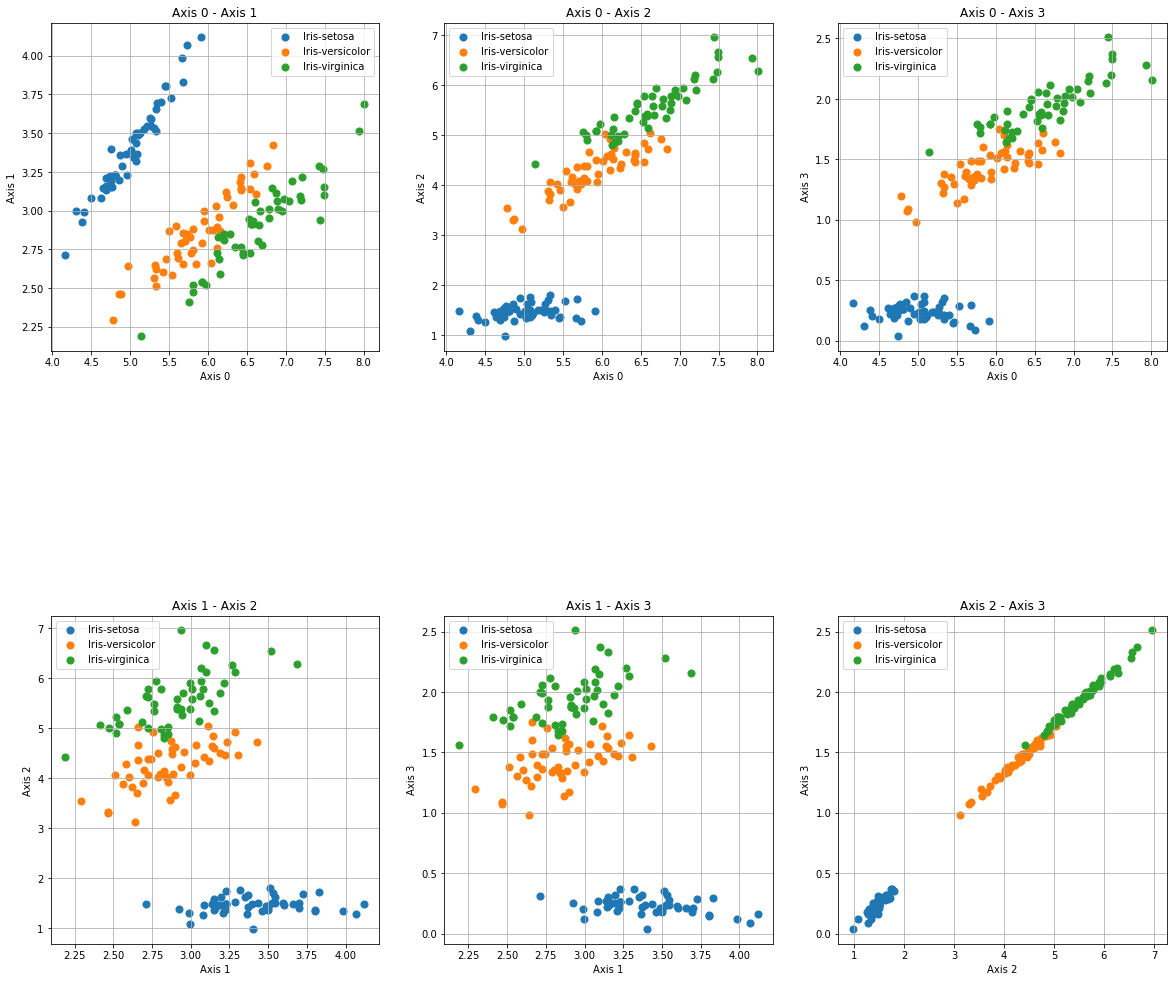

In [28]:
fig = plt.figure(figsize=(20, 20), facecolor='w')
#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
nums = len(list(combinations(range(reduced_x.shape[1]), r=2)))
cols = 3
rows = math.ceil(nums/cols)
i = 0

#fig, ax = plt.subplots(rows, cols)
for couple in combinations(range(reduced_x.shape[1]), r=2):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title("Axis {} - Axis {}".format(couple[0], couple[1]))
    x_ax = reduced_x[:, couple[0]]
    y_ax = reduced_x[:, couple[1]]
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(x_ax[ix], y_ax[ix], label=g, s=50)

    ax.set_xlabel("Axis {}".format(couple[0]))
    ax.set_ylabel("Axis {}".format(couple[1]))
    ax.set_aspect(abs((x_ax.max() - x_ax.min())/(y_ax.max() - y_ax.min()))*1.0)
    ax.grid()
    ax.legend()
    i += 1

Kiểm nghiệm $\lVert \bold{D} - \bold{D}_q \rVert_{\bold{F}}^2 = \sum_{i=q+1}^d \delta_i^2$

In [29]:
np.sum((x - reduced_x)**2)

15.566331012128213

In [30]:
1.20360193e+01 + 3.53031167e+00

15.56633097